# Importing Libraries

In [20]:
import os, sys, email
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Loading Data

In [21]:
# Read data  and analyze 1000 emails first due to lack of memory
data = pd.read_csv('data/emails.csv', nrows=10000)
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [22]:
# checking data shape
data.shape

(10000, 2)

In [23]:
# view a single message
print(data['message'][5])

Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 04:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 How about either next Tuesday or Thursday?

Phillip


# Data Pre-processing

In [24]:
def get_text_from_email(msg):
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append(part.get_payload())
    return ''.join(parts)

In [25]:
def split_email_addresses(line):
    # separate multiple email addresses
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x:x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [26]:
# parse email into a list of email objects
messages = list(map(email.message_from_string, data['message']))
data.drop('message', axis=1, inplace=True)
# Get fields from parsed email fields
keys = messages[0].keys()
keys

['Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']

In [27]:
for key in keys:
    data[key] = [doc[key] for doc in messages]
# Parse content from emails
data['content'] = list(map(get_text_from_email, messages))
# split multiple email addresses
data['To'] = data['To'].map(split_email_addresses)

In [28]:
data.head(2)

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...


In [29]:
data.shape

(10000, 17)

In [30]:
# Extract the root of file as user
data['user'] = data['file'].map(lambda x:x.split('/')[0])

In [31]:
del messages

In [32]:
# successful parsing message contents and fields
print(data.head())

                       file                                     Message-ID  \
0     allen-p/_sent_mail/1.  <18782981.1075855378110.JavaMail.evans@thyme>   
1    allen-p/_sent_mail/10.  <15464986.1075855378456.JavaMail.evans@thyme>   
2   allen-p/_sent_mail/100.  <24216240.1075855687451.JavaMail.evans@thyme>   
3  allen-p/_sent_mail/1000.  <13505866.1075863688222.JavaMail.evans@thyme>   
4  allen-p/_sent_mail/1001.  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                     From  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  phillip.allen@enron.com   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  phillip.allen@enron.com   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  phillip.allen@enron.com   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  phillip.allen@enron.com   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  phillip.allen@enron.com   

                          To    Subject Mime-Version  \
0     (tim.belden@enron.com)                     1.0   
1  (

In [33]:
data.user.value_counts()

arnold-j    4898
allen-p     3034
badeer-r     877
arora-h      654
bailey-s     478
bass-e        59
Name: user, dtype: int64

In [34]:
# checking shape again
data.shape

(10000, 18)

In [35]:
# Set index and drop columns with two few values
data = data.set_index('Message-ID').drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)

In [36]:
# Parse datetime
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, utc=True)
#data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d').dt.strftime("%Y%m")
print(data.dtypes)

Date          datetime64[ns, UTC]
From                       object
To                         object
Subject                    object
X-From                     object
X-To                       object
X-cc                       object
X-bcc                      object
X-Folder                   object
X-Origin                   object
X-FileName                 object
content                    object
user                       object
dtype: object


In [37]:
data.head()

,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
Message-ID,,,,,,,,,,,,,
<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,(tim.belden@enron.com),,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,(john.lavorato@enron.com),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,(leah.arsdall@enron.com),Re: test,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,(randall.gay@enron.com),,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,(greg.piper@enron.com),Re: Hello,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [38]:
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [39]:
data["content"] = data["content"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [40]:
data["content"].head()

Message-ID
<18782981.1075855378110.JavaMail.evans@thyme>                                        here forecast
<15464986.1075855378456.JavaMail.evans@thyme>    traveling business meeting takes fun trip. esp...
<24216240.1075855687451.JavaMail.evans@thyme>                           test successful. way go!!!
<13505866.1075863688222.JavaMail.evans@thyme>    randy, can send schedule salary level everyone...
<30922949.1075863688243.JavaMail.evans@thyme>                           let's shoot tuesday 11:45.
Name: content, dtype: object

# Exploratory Data Analaysis (EDA)

Text(0, 0.5, 'No of emails')

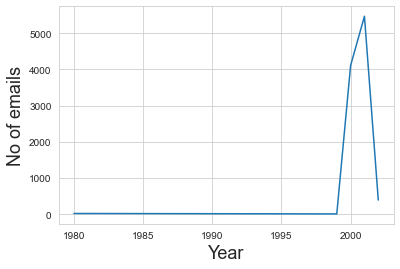

In [41]:
# Checking when emails were sent as a plot (Years)
ax = data.groupby(data['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('No of emails', fontsize=18)

Text(0, 0.5, 'No of emails')

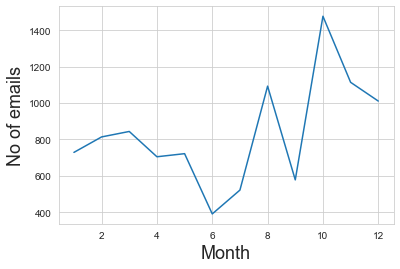

In [42]:
# Find out when emails were sent as a plot (months)
ax = data.groupby(data['Date'].dt.month)['content'].count().plot()
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('No of emails', fontsize=18)
# plt.show()

Text(0, 0.5, 'No of emails')

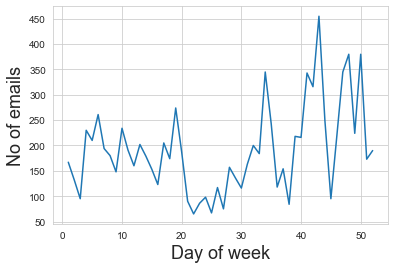

In [43]:
# Find out when emails were sent as a plot (Days of the week)
ax = data.groupby(data['Date'].dt.isocalendar().week)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('No of emails', fontsize=18)
# plt.show()

In [44]:
# count the word in the subject and content
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
data['subject_wc'] = data['Subject'].map(lambda x:len(tokenizer.tokenize(x)))
data['content_wc'] = data['content'].map(lambda x:len(tokenizer.tokenize(x)))

group_by_people = data.groupby('user').agg({'content': 'count', 'subject_wc': 'mean', 'content_wc':'mean'})

group_by_people.rename(columns={'content': 'No of emails',
                                'subject_wc': 'Subject word count',
                                'content_wc': 'Content word count'}, inplace=True)

In [45]:
data.head()

,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,subject_wc,content_wc
Message-ID,,,,,,,,,,,,,,,
<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,(tim.belden@enron.com),,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,here forecast,allen-p,0,2
<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,(john.lavorato@enron.com),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,traveling business meeting takes fun trip. esp...,allen-p,1,80
<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,(leah.arsdall@enron.com),Re: test,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way go!!!,allen-p,2,4
<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,(randall.gay@enron.com),,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"randy, can send schedule salary level everyone...",allen-p,0,17
<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,(greg.piper@enron.com),Re: Hello,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,let's shoot tuesday 11:45.,allen-p,2,5


In [46]:
data.user.value_counts()

arnold-j    4898
allen-p     3034
badeer-r     877
arora-h      654
bailey-s     478
bass-e        59
Name: user, dtype: int64

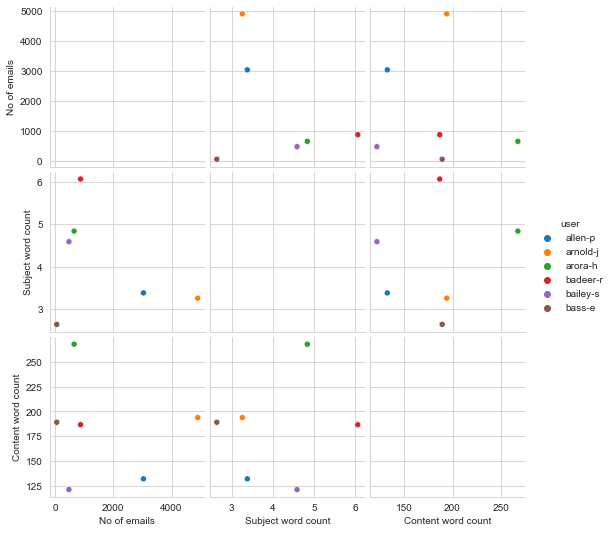

In [47]:
sns.pairplot(group_by_people.reset_index(), hue='user')

In [48]:
# analyze emails from ->to 
ea_df = data[['From', 'To', 'Date']].dropna()

# drop emails sent to multiple email addresses
ea_df = ea_df.loc[ea_df['To'].map(len) == 1]
# print(sub_df.shape)

#who sent, what, to whom
sub_df = ea_df.groupby(['From', 'To']).count().reset_index()

ea_df['From'] = ea_df['From'].map(lambda x: next(iter(x)))
ea_df['To'] = ea_df['To'].map(lambda x: next(iter(x)))

# rename column and print top 10 of email sendings
ea_df.rename(columns={'Date': 'count'}, inplace=True)
print(ea_df.sort_values(by='count', ascending=False).head(10))

                                              From  \
Message-ID                                           
<1543973.1075861110405.JavaMail.evans@thyme>     s   
<11981175.1075861110426.JavaMail.evans@thyme>    s   
<3994999.1075861110382.JavaMail.evans@thyme>     l   
<16435604.1075861110336.JavaMail.evans@thyme>    n   
<6984580.1075861110313.JavaMail.evans@thyme>     p   
<19417944.1075861110290.JavaMail.evans@thyme>    p   
<4517138.1075861110268.JavaMail.evans@thyme>     p   
<33093519.1075861110245.JavaMail.evans@thyme>    l   
<20852901.1075861110197.JavaMail.evans@thyme>    l   
<32230754.1075861110221.JavaMail.evans@thyme>    n   

                                                                       To  \
Message-ID                                                                  
<1543973.1075861110405.JavaMail.evans@thyme>       susan.bailey@enron.com   
<11981175.1075861110426.JavaMail.evans@thyme>     louis.dicarlo@enron.com   
<3994999.1075861110382.JavaMail.evans@thyme

(-0.5, 799.5, 599.5, -0.5)

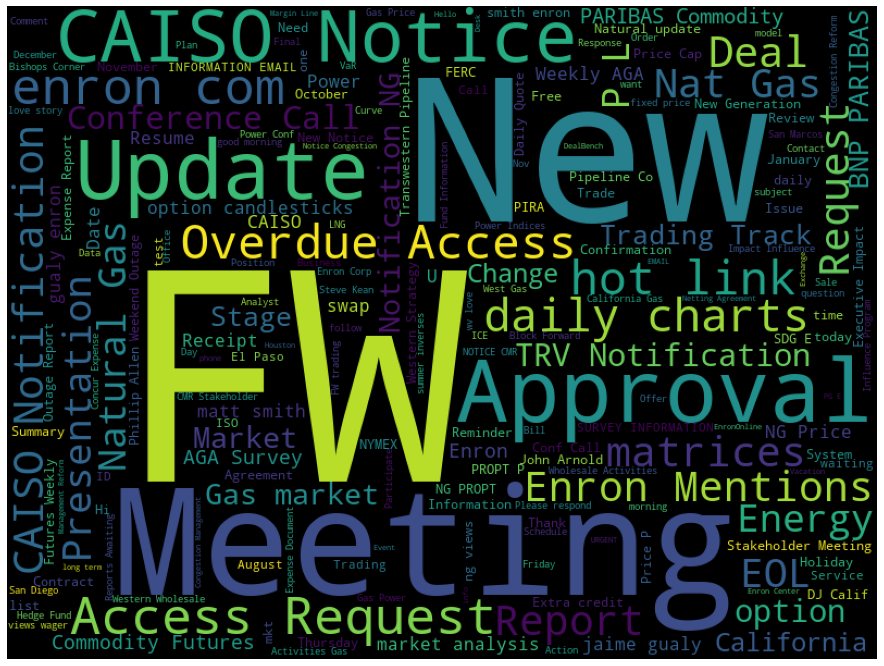

In [49]:
# subject of the email
import wordcloud
subjects = ' '.join(data['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800,
                         height=600,
                         max_words=200,
                         stopwords=stop_words).generate(subjects)
ax.imshow(wc)
ax.axis("off")

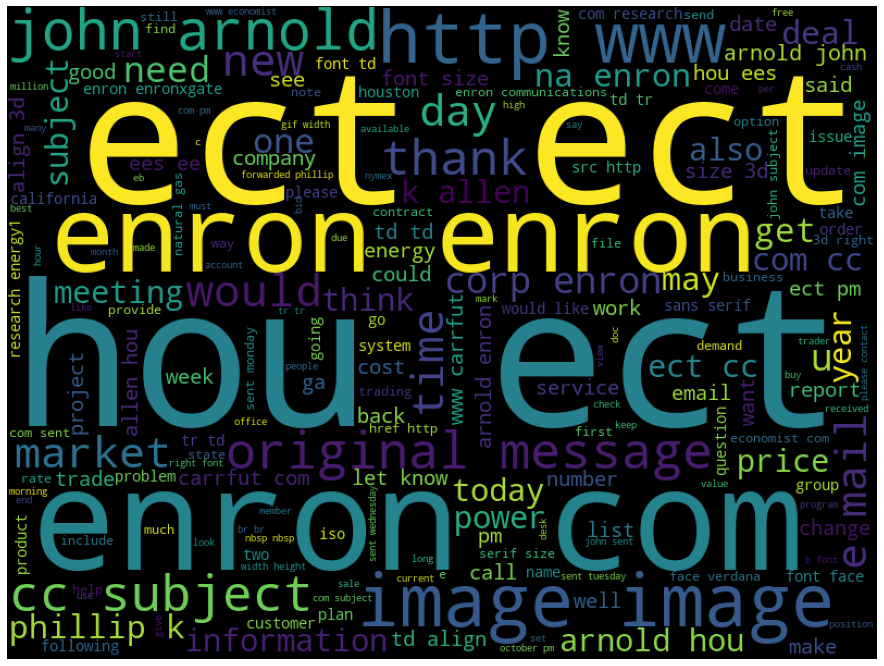

In [50]:
# content of the email
contents = ' '.join(data.sample(1000)['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800,
                         height=600,
                         max_words=200,
                         stopwords=stop_words).generate(contents)
ax.imshow(wc)
ax.axis("off")
plt.show()

# Dominance Analysis

**Using TextBlob** - is the python library for processing textual data

In [ ]:
#!pip install textblob

In [51]:
from textblob import TextBlob

In [52]:
block = TextBlob(data.content[1])
sent = block.sentiment
pol = sent[0]
subj = sent[1]

In [53]:
print("The polarity was found to be : " + str(pol) )
print("The subjectivity was found to be : " + str(subj) )

The polarity was found to be : 0.15
The subjectivity was found to be : 0.6133333333333333


In [54]:
print("The analysis found the text to be:\n")
if(pol>0.1):
    print("Mildy positive")
elif(pol>=1):
    print("Positive")
elif(pol<-0.1):
    print("Mildly negative")
elif(pol<=-1):
    print("Negative")
else:
    print("Neutral")
            
if(subj>0.7):
    print("Mostly opinionative")
elif(subj<0.3):
    print("Mostly factual")
else:
    print("Semi-factual")

The analysis found the text to be:

Mildy positive
Semi-factual


**Using VADER**

- VADER (Valence Aware Dictionary and Entiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 
- VADER uses a combination of a sentiment lexicon, is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. 
- VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment.

- The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
- positive : (compound score >= 0.05) 
- neutral : (compound score > -0.05) and (compound score < 0.05) 
- negative : (compound score <= -0.05)

In [58]:
import nltk
#nltk.download('vader_lexicon')

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [60]:
#from nltk import sentiment

In [61]:
sid = SentimentIntensityAnalyzer()

In [62]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [63]:
message_text = '''Happy to see you'''

# The tokenize method breaks up the paragraph into a list of strings. In this example, note that the tokenizer is confused by the absence of spaces after periods and actually fails to break up sentences in two instances. How might you fix that?

sentences = tokenizer.tokenize(message_text)

# We add the additional step of iterating through the list of sentences and calculating and printing polarity scores for each one.

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()

Happy to see you
compound: 0.5719, neg: 0.0, neu: 0.448, pos: 0.552, 


In [68]:
def text_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall Text dictionary is : ", sentiment_dict)
    print("Text was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Text was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Text was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Text overall rated as", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05:
        print("Positive")
    elif sentiment_dict['compound'] <= -0.05:
        print("Negative")
    else :
        print("Neutral")

In [69]:
for sentence in data.content[0:5]:
    print("\nEmail Text:",sentence)
    text_scores(sentence)


Email Text: here forecast
Overall Text dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text was rated as  0.0 % Negative
Text was rated as  100.0 % Neutral
Text was rated as  0.0 % Positive
Text overall rated as Neutral

Email Text: traveling business meeting takes fun trip. especially prepare presentation. i would suggest holding business plan meetings take trip without formal business meetings. i would even try get honest opinions whether trip even desired necessary. as far business meetings, i think would productive try stimulate discussions across different groups working not. too often presenter speaks others quiet waiting turn. the meetings might better held round table discussion format. my suggestion go austin. play golf rent ski boat jet ski's. flying somewhere takes much time.
Overall Text dictionary is :  {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.9313}
Text was rated as  0.0 % Negative
Text was rated as  82.3 % Neutral
Text was rated as  